# 경량화 과제
경량화 과제 첫번째 과제 파일 입니다. 
이번 과제는 주로 주어진 데이터셋에 대한 분석을 중점으로 진행 되겠습니다. 

세부 내용은 다음과 같습니다. 

```
과제1. 주어진 데이터셋에 대한 분석 및 데이터 로드

1. Data 압축 풀어 옮기기
2. `.jpg` 프린트 해보기 
3. `.metadata` 살펴보기
4. `.txt` 살펴보기 
5. 전체 데이터 프린트 해보기
```

In [ ]:
# GPU 할당확인 
import torch

print('CUDA GPU availalbe : {}'.format(torch.cuda.is_available()))
try:
    print('{} GPU(s) is(are) allocated'.format(torch.cuda.device_count()))
except:
    print('GPUs are not allocated. Current runtime is on CPU.')

CUDA GPU availalbe : True
1 GPU(s) is(are) allocated


In [ ]:
# 코랩 내 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Path 설정 
import os
if not os.path.exists('/content/gdrive/My Drive/dataset/'):
  os.mkdir('/content/gdrive/My Drive/dataset/')
os.chdir('/content/gdrive/My Drive/dataset/') # Data_Path
current_path = os.getcwd() # current folder
print('current_path', current_path)

current_path /content/gdrive/My Drive/dataset


## 데이터 압축해제

- 주의사항: 처음 이 셀을 실행하고 나서 성공적으로 압축이 풀렸으면 다시 실행하지 않아도 됩니다.

- 에러 발생

  "AssertionError: # of image files and # of json files do not match"
: 간혹가다 드라이브에서 압축을 푸는 과정에서 drop이 생길 수도 있습니다.

- 해결책 
 1. 먼저 런타임을 다시 시작해보고 그래도 안되면<br>
 2. 압축을 해제한 data 폴더를 지우고, 아래의 셀을 다시 실행하면 됩니다

In [ ]:
# 압축풀기 한번 만 실행 할 것! 
%time
!tar -xf ./APY170401435_subet_5gb.tar.xz

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [ ]:
# 압축 해제 확인 
# 총 101 개의 파일이 있습니다. 
import os
from glob import glob

try:
  assert (len(os.listdir('./APY170401435_subset_13gb/'))==101)
  print('unzip succeed')
except:
  print(len(os.listdir('./APY170401435_subset_13gb/')))
  print("unzip failed")

unzip succeed


## 데이터 구조

Data storagget structure는 다음과 같이 구성 되어 있습니다. 

```
ZIP file
  |-data
      |-category
              |-G0001
                  |- .txt
                  |- .jpg
                  |- .metadata
              |-G0002
              |-G0003
              ...
              |-G0150
```

## 데이터 이동

추후 모델 학습을 위하여 하나의 폴더에 옮겨 주어야 됩니다. 따라서, 데이터를 `total` 폴더로 이동시키도록 하겠습니다. 


In [ ]:
from glob import glob
from tqdm.notebook import tqdm
import shutil
import os 

def move_data(img_path='./APY170401435_subset_13gb/', save='./total'):

  # make folder 
  if not os.path.exists(save):
    os.mkdir(save)
  # session
  session = 'session01'
  folder_list = ['G{:04d}'.format(i) for i in range(1,101+1)]
  
  for folder_name in tqdm(folder_list):
    src = os.path.join(img_path,folder_name,session)
    jpg_list = sorted(glob(src+'/*.jpg'))
    metadata_list = sorted(glob(src+'/*.metadata'))
    txt_list = sorted(glob(src+'/*.txt'))


    # rename move 
    for jpg in jpg_list:
       jpg_rename = os.path.join(src,folder_name+'_'+jpg.split('/')[-1])
       metadata_rename = jpg_rename[:-3]+'metadata'
       meta = jpg[:-3]+'metadata'
       jpg_dst = os.path.join(save, jpg_rename.split('/')[-1])
       meta_dst = os.path.join(save, metadata_rename.split('/')[-1])
       
       txt = jpg[:-3]+'txt'
       txt_rename = jpg_rename[:-3]+'txt'
       txt_dst = os.path.join(save, txt_rename.split('/')[-1])

       os.rename(jpg, jpg_rename)
       os.rename(meta, metadata_rename)
       os.rename(txt,txt_rename)

       shutil.move(jpg_rename, jpg_dst) 
       shutil.move(metadata_rename, meta_dst) 
       shutil.move(txt_rename, txt_dst)
  return print('[INFO] done ... ')

move_data()


[INFO] done ... 


## 파일이동 확인 
정상적으로 파일이 옮겨졌는지 확인 합니다. 

In [ ]:
from glob import glob

image = sorted(glob('/content/gdrive/My Drive/dataset/total/*.jpg'))
meta = sorted(glob('/content/gdrive/My Drive/dataset/total/*.metadata'))

if len(image) == len(meta):
    print('train data ({} files) unzip succeed'.format(len(image)))
else:
    print('train data unzip failed')

train data (3881 files) unzip succeed


## 주어진 데이터 살펴보기 (EDA)

데이터 이름: 399 Chinese People 35,112 Images Multi-pose Face Data with 21<p>
공식 홈페이지: https://www.datatang.ai/dataset/info/image/173<p>
데이터 설명: 
<p>
<center><img src='https://www.tugraz.at/fileadmin/user_upload/Institute/ICG/Images/team_bischof/lrs/downloads/download-aflw.jpg' width=60%>

|Databse|# landmarked imgs|#landmarks|#image size|image color|
|:--:|--|--|--|--|
|399Chinese people multi-pos data|35112|21|960*1280|color|
</center>




## `.metadata` & '.jpg`& `.txt` 를 살펴보기 

### `.jpg` 에서 print 해보기 



In [ ]:
# 1. sample 하나 고르기 
sample_img = sorted(glob('./total/*.jpg'))[2]
sample_meta = sample_img[:-3]+'metadata'
sample_txt = sample_img[:-3]+'txt'
print(sample_img)
print(sample_meta)
print(sample_txt)


./total_data/G0001_12_indoor1_glasses_front1.jpg
./total_data/G0001_12_indoor1_glasses_front1.metadata
./total_data/G0001_12_indoor1_glasses_front1.txt


Image name: ./total_data/G0001_12_indoor1_glasses_front1.jpg 
Image shape: (800, 600, 3)


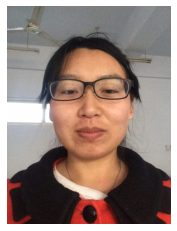

In [ ]:
# 2. sample image show()
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(sample_img, cv2.IMREAD_COLOR) # imread 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv BGR --> RGB

print(f'Image name: {sample_img} \nImage shape: {img.shape}')

plt.imshow(img)
plt.axis('off')
plt.show()

### `.metadata` 에서 여러 가지 라벨 확인하기


`.metadata`에서는 주어진 데이터를 여러가지로 활용 할 수 있게끔 많은 라벨을 제공합니다. 

> The data diversity includes multiple poses, different ages, different light conditions and multiple scenes. This data can be used for tasks such as face detection and face recognition.  ___official site_

In [ ]:
# 3. sample .metadata print()
f = open(sample_meta, "r")
for line in f.readlines():
  print(line)

NuoGuES	G0001

DIR	data\category\G0001\session01

IOI	human face

REC	China

SEN	indoor

SEA	

WEA	

TIM	

ILS	front1 normal light

VEP	

INS	camera of cellphone

DTF	jpg

RES	600*800

FPS	

ANF	spot annotationMo乮llumination intensityMoShiuman face angle

ANC	human face21key point

COI	

CMT	*** HUMAN FACE ***

SCD	

BIR	China

SKC	

BRD	1997

SEX	female

AGE	

AOF	

POF	

EXP	

HAR	

HAC	

OCC	

CMT	*** ROAD INFO ***

ROC	

MOC	

LOC	

CMT	*** OCR ***

LNG	

FNT	

NUM	

TEC	



### `.txt` 에서 Ladmark 좌표 확인하기

<img src='https://www.researchgate.net/profile/Horst-Bischof/publication/221430174/figure/fig2/AS:670013061095428@1536754970049/The-AFLW-markup-defines-21-facial-landmarks-that-are-located-between-eyebrows-and-chin_Q320.jpg' ><br>

`.txt`에는 landmark의 좌표가 저장되어 있으며 총 43개의 값이 존재 합니다. 

맨처음 값은 라벨을 뜻하며, 두 번째 값부터 landmark 좌표 입니다. 상세 내용은 다음과 같습니다. 

Data Format
1. tip of left eyebrow 
2. center of left eyebrow
3. right tip of left eyebrow
4. left tip of right eyebrow
5. center of right eyebrow 
6. right tip of right eyebrow
7. left corner of left eye
8. left pupil or center of left eye when left eye is closed
9. right corner of left eye 
10. left corner of right eye
11. right pupil or center of right eye when right eye is closed
12. right corner of right eye 
13. the intersection point of the lower part of left ear and face outline
14. the outermost side of left wing of nose
15. tip of nose
16. the outermost side of right wing of nose
17. the intersection point of the lower part of rightear and face outline
18. corner of left mouth 
19. Center of mouth
20. corner of right mouth 
21. center for chin


In [ ]:
# define meta dict 
meta_dict = { 0: 'tip of left eyebrow',
              1: 'center of left eyebrow',
              2: 'right tip of left eyebrow',
              3: 'left tip of right eyebrow',
              4: 'center of right eyebrow',
              5: 'right tip of right eyebrow',
              6: 'left corner of left eye',
              7: 'left pupil or center of left eye when left eye is closed',
              8: 'right corner of left eye',
              9: 'left corner of right eye',
              10: 'right pupil or center of right eye when right eye is closed',
              11: 'right corner of right eye',
              12: 'the intersection point of the lower part of left ear and face outline',
              13: 'the outermost side of left wing of nose',
              14: 'tip of nose',
              15: 'the outermost side of right wing of nose',
              16: 'the intersection point of the lower part of rightear and face outline',
              17: 'corner of left mouth',
              18: 'Center of mouth',
              19: 'corner of right mouth',
              20: 'center for chin'
}
# print(meta_dict)

In [ ]:
# sample .metadata print()
f = open(sample_txt, "r")
for line in f.readlines():
    for m, b in enumerate(line.split('\t')[1].split(',')):
      if m<=20:
        print(f' {meta_dict[m%20]}_x: {b}')
      else:
        print(f' {meta_dict[m%20]}_y: {b}')

 tip of left eyebrow_x: -178.28790087463562
 center of left eyebrow_x: -271.835641399417
 right tip of left eyebrow_x: 219.8330903790088
 left tip of right eyebrow_x: 253.24963556851318
 center of right eyebrow_x: 262.8360058309039
 right tip of right eyebrow_x: 267.09803206997094
 left corner of left eye_x: -336.08673469387764
 left pupil or center of left eye when left eye is closed_x: -270.01348396501464
 right corner of left eye_x: 382.3695335276969
 left corner of right eye_x: 254.70736151603506
 right pupil or center of right eye when right eye is closed_x: -423.91472303207007
 right corner of right eye_x: -270.7423469387756
 the intersection point of the lower part of left ear and face outline_x: 203.68469387755107
 the outermost side of left wing of nose_x: 317.81479591836734
 tip of nose_x: 233.78673469387758
 the outermost side of right wing of nose_x: 314.2433673469388
 the intersection point of the lower part of rightear and face outline_x: 259.2969387755102
 corner of left

In [ ]:
# 2. sample image에 대해 LandMark 표시하기 

# ---------------------------------------------------------------------------- #
# (코드 채우기) LandMark와 jpg 동시에 나타내기
# point_dic 함수를 정의 합니다. 입력값은 .txt 이며 출력값은 label, x, y 입니다.  
# *주의* 맨 처음 값은 label을 뜻합니다. 
# ---------------------------------------------------------------------------- #

def point_dic(img1_disc):
    '''
    input = .txt
    output =  label, x, y 
    '''
    # 코드를 입력하세요.




    return {'label':label, 'x':xlist, 'y':ylist}


In [ ]:
# show()
img = cv2.imread(sample_img, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
point = point_dic(sample_txt)
plt.scatter(point['x'], point['y'], s = 20, c = 'red')
plt.axis('off')
plt.show()

NameError: ignored

### 20개의 데이터에 대해 LandMark 표시하여 프린트 해보기 

In [ ]:
%matplotlib inline
# ---------------------------------------------------------------------------- #
# (코드 채우기) 20 개의 데이터에 대해 LandMark 표시하여 다음과 같은 결과가 나오도록 프린트 해보기 
# ---------------------------------------------------------------------------- #



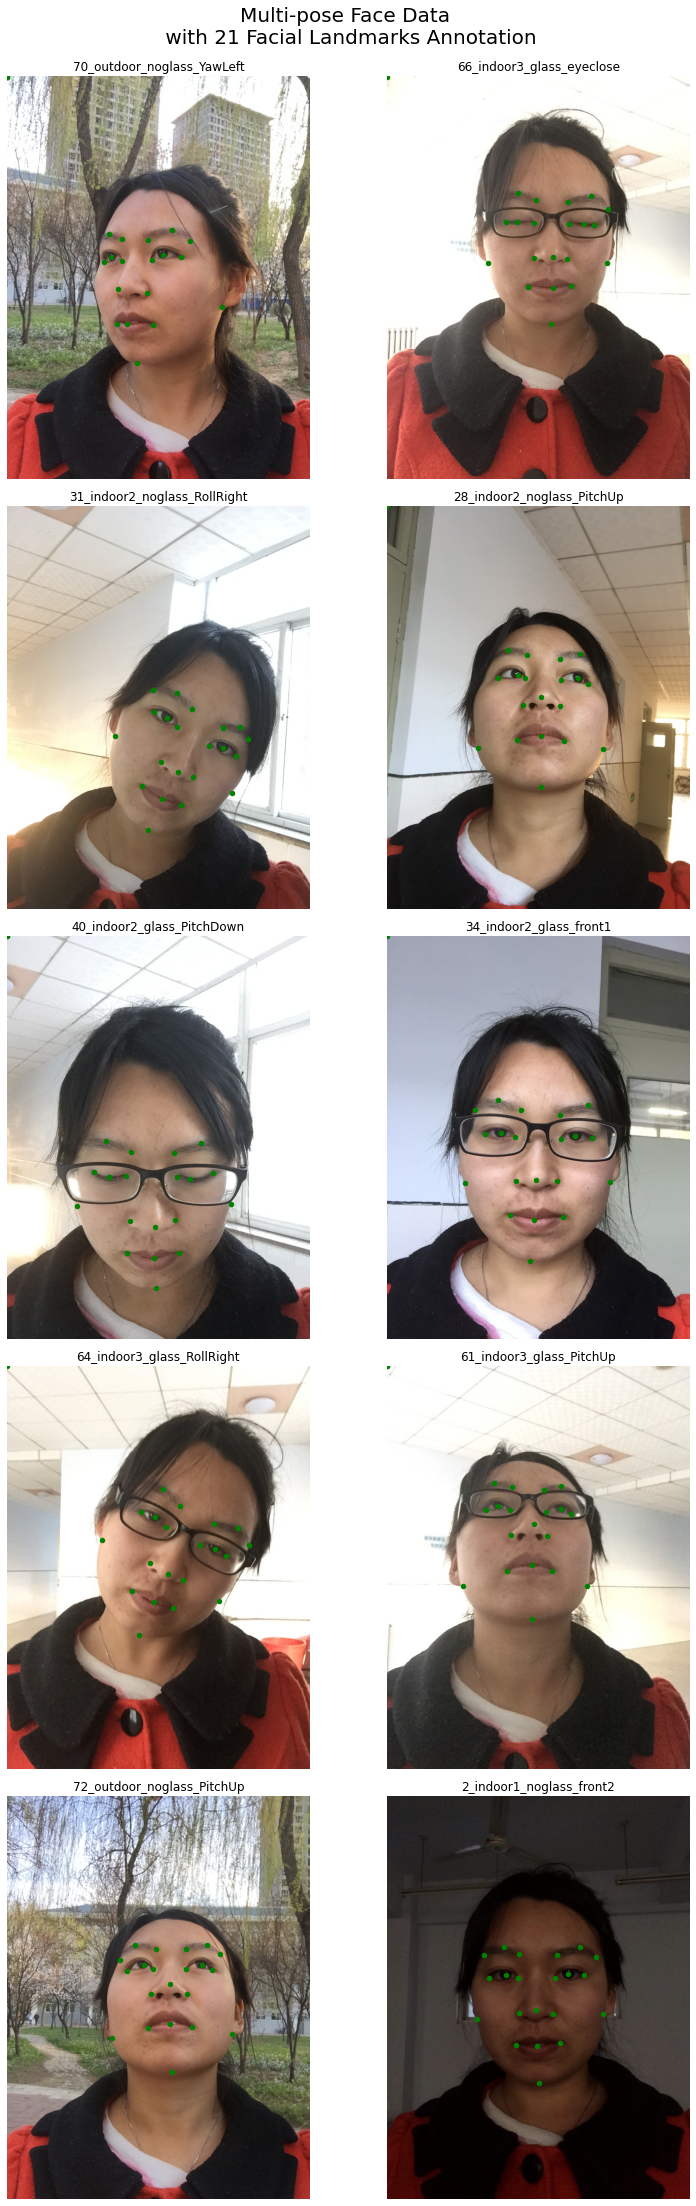